# Testing getting new features:

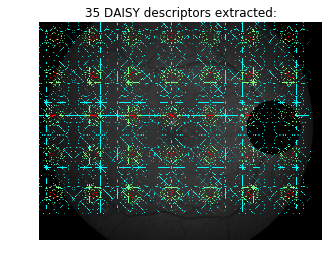

In [8]:
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import data, color
from skimage.io import imread, imshow
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
import cv2
from skimage.feature import hog
from skimage import data, exposure
from skimage.feature import greycomatrix, greycoprops
from skimage import data

im = imread('ODmasked-image-274.png')
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

descs, descs_img = daisy(img, step=180, radius=68, rings=2, histograms=6,
                         orientations=8, visualize=True)

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()

In [5]:
import cv2
import numpy as np
img = cv2.imread('ODmasked-image-274.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,None)
print(len(kp))
print(kp)
cv2.imwrite('sift_keypoints.jpg',img)





29
[<KeyPoint 00000104EEA2E5D0>, <KeyPoint 00000104ED467540>, <KeyPoint 00000104F03F9C30>, <KeyPoint 00000104F03F9B40>, <KeyPoint 00000104F03F9B10>, <KeyPoint 00000104F03F9B70>, <KeyPoint 00000104F03F9C60>, <KeyPoint 00000104F03F9CF0>, <KeyPoint 00000104F03F9BD0>, <KeyPoint 00000104F03F9CC0>, <KeyPoint 00000104F03F9C90>, <KeyPoint 00000104F03F9D20>, <KeyPoint 00000104F03F9D50>, <KeyPoint 00000104F03F9D80>, <KeyPoint 00000104F03F9DB0>, <KeyPoint 00000104F03F9DE0>, <KeyPoint 00000104F03F9E10>, <KeyPoint 00000104F03F9E40>, <KeyPoint 00000104F03F9E70>, <KeyPoint 00000104F03F9EA0>, <KeyPoint 00000104F03F9ED0>, <KeyPoint 00000104F03F9F00>, <KeyPoint 00000104F03F9F30>, <KeyPoint 00000104F03F9F60>, <KeyPoint 00000104F03F9F90>, <KeyPoint 00000104F03F9FC0>, <KeyPoint 0000010481E47030>, <KeyPoint 0000010481E47060>, <KeyPoint 0000010481E47090>]


True

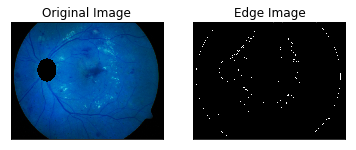

10003


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('ODmasked-image-278.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img,50,100)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
print(np.count_nonzero(edges))

In [4]:
from PIL import Image
im_canny = Image.fromarray(edges)
im_canny.save("canny-278.jpeg")

In [9]:
g = greycomatrix(gray, [1, 2], [0, np.pi/2], levels=255,
                  normed=True, symmetric=True)
contrast = greycoprops(g, 'contrast')
contrast

array([[ 6.54621093, 10.08197274],
       [15.02440139, 16.83176353]])

In [5]:
#Feature Functions
def subsection(image,start_y,start_x,dimension_y,dimension_x):

    s_image = image[start_y:(start_y+dimension_y),start_x:(start_x+dimension_x)]

    print(s_image.shape)
    return s_image

def get_hog(image):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(20, 20),
                    cells_per_block=(2, 2), visualize=True)
    return fd, hog_image #remove hog_image LATER!!!

def get_sift(image):
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(image,None)
    return len(kp)
def get_canny(image):
    edges = cv2.Canny(image,50,100)

    return np.count_nonzero(edges)
def get_greycoprops(image):
    g = greycomatrix(image, [1, 2], [0, np.pi/2], levels=255,
                  normed=True, symmetric=True)
    contrast = greycoprops(g, 'contrast')
    return list(contrast.flatten())         

C:\Users\Alex\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


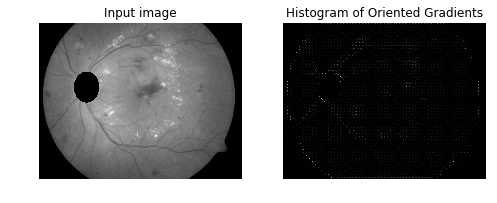

[0.00000000e+00 2.49999994e-04 3.53553379e-04 ... 9.71966028e-01
 9.94163511e-01 1.00000000e+00]


True

In [29]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure

fd, hog_image = get_hog(gray)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(gray, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

#hog_image_rescaled = hog_image_rescaled.convert('RGB')
print(np.unique(hog_image_rescaled))
hog_image[hog_image != 0] *= 35

from PIL import Image
im_hog = Image.fromarray(hog_image)
if im_hog.mode != 'RGB':
    im_hog = im_hog.convert('RGB')
im_hog.save("hog-278.jpeg")

#SIFT 


sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,None)
cv2.imwrite('sift-278.jpg',img)


In [16]:
import csv
import os
import pandas as pd

featuredata = pd.read_csv("features.csv") 
headings = list(featuredata.columns.values)

print(list(featuredata[featuredata["image"]=="ODmasked-image-1.png"]))
with open('ImageSubsections.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    count = 1
    lengths = []
    with open("E:/Users/Alex/Eyeballs/300x500WithMask.csv", "w",newline='') as fp:
        wr = csv.writer(fp, dialect='excel')
        for row in reader:
            print(count)
            imageName = row['image']
            start_x  = int(row['start_x'])
            start_y  = int(row['start_y'])
            center_x = int(row['x'])
            center_y = int(row['y'])
            DR       = row['exudates'] 
            fileLocation = 'E:/Users/Alex/Dropbox/MEng Software/Winter-Term-2019/Big Data/Project/masked images (1)/' +imageName



            im = imread(fileLocation)

            imgrey = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

            #dimension of subsection
            dimension_x = 300 #dimension of subsection
            dimension_y = 500 #dimension of subsection

            if start_x+dimension_x > 1300:
                    start_x = 1300-dimension_x
            if start_y+dimension_y > 1000:
                start_y = 1000-dimension_y
            imgrey_sub = subsection(imgrey,start_y,start_x,dimension_y,dimension_x)
            im_sub = subsection(im,start_y,start_x,dimension_y,dimension_x)
#            print(start_x,im_sub.shape)
            
            hog_values = list(get_hog(im_sub))
            sift_kps = get_sift(im_sub)
            canny_count = get_canny(im_sub)
            gcp_values = get_greycoprops(imgrey_sub)
            
            if count == 1:
                headings += ["hog"+str(i) for i in range(1,len(hog_values)+1)]
                headings += ["siftkps"]
                headings += ["cannycount"]
                headings += ["greycoprops"+str(i) for i in range(1,len(gcp_values)+1)]
                wr.writerow(headings)

            row_list = list(featuredata[featuredata["image"]==imageName].values[0])
            row_list += hog_values
            row_list += [sift_kps]
            row_list += [canny_count]
            row_list += gcp_values
            count +=1
            
            if len(headings)!=len(row_list):
                print("error at: ",imageName,count)
                print(im_sub.shape)
                break
            wr.writerow(row_list)
#             if len(row_list) not in lengths:
#                 print(len(row_list))
#                 lengths.append(len(row_list)) 
        
        #wr.writerow(row_list)    

        

['image', 'entropy', 'left/right (1/0)', 'number of exudate pixels', 'min distance from od centre', 'max distance from od centre', 'average distance from od centre', 'DR']
1
(500, 300)
(500, 300, 3)


C:\Users\Alex\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


2
(500, 300)
(500, 300, 3)
3
(500, 300)
(500, 300, 3)
4
(500, 300)
(500, 300, 3)
5
(500, 300)
(500, 300, 3)
6
(500, 300)
(500, 300, 3)
7
(500, 300)
(500, 300, 3)
8
(500, 300)
(500, 300, 3)
9
(500, 300)
(500, 300, 3)
10
(500, 300)
(500, 300, 3)
11
(500, 300)
(500, 300, 3)
12
(500, 300)
(500, 300, 3)
13
(500, 300)
(500, 300, 3)
14
(500, 300)
(500, 300, 3)
15
(500, 300)
(500, 300, 3)
16
(500, 300)
(500, 300, 3)
17
(500, 300)
(500, 300, 3)
18
(500, 300)
(500, 300, 3)
19
(500, 300)
(500, 300, 3)
20
(500, 300)
(500, 300, 3)
21
(500, 300)
(500, 300, 3)
22
(500, 300)
(500, 300, 3)
23
(500, 300)
(500, 300, 3)
24
(500, 300)
(500, 300, 3)
25
(500, 300)
(500, 300, 3)
26
(500, 300)
(500, 300, 3)
27
(500, 300)
(500, 300, 3)
28
(500, 300)
(500, 300, 3)
29
(500, 300)
(500, 300, 3)
30
(500, 300)
(500, 300, 3)
31
(500, 300)
(500, 300, 3)
32
(500, 300)
(500, 300, 3)
33
(500, 300)
(500, 300, 3)
34
(500, 300)
(500, 300, 3)
35
(500, 300)
(500, 300, 3)
36
(500, 300)
(500, 300, 3)
37
(500, 300)
(500, 300, 3)


289
(500, 300)
(500, 300, 3)
290
(500, 300)
(500, 300, 3)
291
(500, 300)
(500, 300, 3)
292
(500, 300)
(500, 300, 3)
293
(500, 300)
(500, 300, 3)
294
(500, 300)
(500, 300, 3)
295
(500, 300)
(500, 300, 3)
296
(500, 300)
(500, 300, 3)
297
(500, 300)
(500, 300, 3)
298
(500, 300)
(500, 300, 3)
299
(500, 300)
(500, 300, 3)
300
(500, 300)
(500, 300, 3)
301
(500, 300)
(500, 300, 3)
302
(500, 300)
(500, 300, 3)
303
(500, 300)
(500, 300, 3)
304
(500, 300)
(500, 300, 3)
305
(500, 300)
(500, 300, 3)
306
(500, 300)
(500, 300, 3)
307
(500, 300)
(500, 300, 3)
308
(500, 300)
(500, 300, 3)
309
(500, 300)
(500, 300, 3)
310
(500, 300)
(500, 300, 3)
311
(500, 300)
(500, 300, 3)
312
(500, 300)
(500, 300, 3)
313
(500, 300)
(500, 300, 3)
314
(500, 300)
(500, 300, 3)
315
(500, 300)
(500, 300, 3)
316
(500, 300)
(500, 300, 3)
317
(500, 300)
(500, 300, 3)
318
(500, 300)
(500, 300, 3)
319
(500, 300)
(500, 300, 3)
320
(500, 300)
(500, 300, 3)
321
(500, 300)
(500, 300, 3)
322
(500, 300)
(500, 300, 3)
323
(500, 300)

572
(500, 300)
(500, 300, 3)
573
(500, 300)
(500, 300, 3)
574
(500, 300)
(500, 300, 3)
575
(500, 300)
(500, 300, 3)
576
(500, 300)
(500, 300, 3)
577
(500, 300)
(500, 300, 3)
578
(500, 300)
(500, 300, 3)
579
(500, 300)
(500, 300, 3)
580
(500, 300)
(500, 300, 3)
581
(500, 300)
(500, 300, 3)
582
(500, 300)
(500, 300, 3)
583
(500, 300)
(500, 300, 3)
584
(500, 300)
(500, 300, 3)
585
(500, 300)
(500, 300, 3)
586
(500, 300)
(500, 300, 3)
587
(500, 300)
(500, 300, 3)
588
(500, 300)
(500, 300, 3)
589
(500, 300)
(500, 300, 3)
590
(500, 300)
(500, 300, 3)
591
(500, 300)
(500, 300, 3)
592
(500, 300)
(500, 300, 3)
593
(500, 300)
(500, 300, 3)
594
(500, 300)
(500, 300, 3)
595
(500, 300)
(500, 300, 3)
596
(500, 300)
(500, 300, 3)
597
(500, 300)
(500, 300, 3)
598
(500, 300)
(500, 300, 3)
599
(500, 300)
(500, 300, 3)
600
(500, 300)
(500, 300, 3)
601
(500, 300)
(500, 300, 3)
602
(500, 300)
(500, 300, 3)
603
(500, 300)
(500, 300, 3)
604
(500, 300)
(500, 300, 3)
605
(500, 300)
(500, 300, 3)
606
(500, 300)

855
(500, 300)
(500, 300, 3)
856
(500, 300)
(500, 300, 3)
857
(500, 300)
(500, 300, 3)
858
(500, 300)
(500, 300, 3)
859
(500, 300)
(500, 300, 3)
860
(500, 300)
(500, 300, 3)
861
(500, 300)
(500, 300, 3)
862
(500, 300)
(500, 300, 3)
863
(500, 300)
(500, 300, 3)
864
(500, 300)
(500, 300, 3)
865
(500, 300)
(500, 300, 3)
866
(500, 300)
(500, 300, 3)
867
(500, 300)
(500, 300, 3)
868
(500, 300)
(500, 300, 3)
869
(500, 300)
(500, 300, 3)
870
(500, 300)
(500, 300, 3)
871
(500, 300)
(500, 300, 3)
872
(500, 300)
(500, 300, 3)
873
(500, 300)
(500, 300, 3)
874
(500, 300)
(500, 300, 3)
875
(500, 300)
(500, 300, 3)
876
(500, 300)
(500, 300, 3)
877
(500, 300)
(500, 300, 3)
878
(500, 300)
(500, 300, 3)
879
(500, 300)
(500, 300, 3)
880
(500, 300)
(500, 300, 3)
881
(500, 300)
(500, 300, 3)
882
(500, 300)
(500, 300, 3)
883
(500, 300)
(500, 300, 3)
884
(500, 300)
(500, 300, 3)
885
(500, 300)
(500, 300, 3)
886
(500, 300)
(500, 300, 3)
887
(500, 300)
(500, 300, 3)
888
(500, 300)
(500, 300, 3)
889
(500, 300)

1133
(500, 300)
(500, 300, 3)
1134
(500, 300)
(500, 300, 3)
1135
(500, 300)
(500, 300, 3)
1136
(500, 300)
(500, 300, 3)
1137
(500, 300)
(500, 300, 3)
1138
(500, 300)
(500, 300, 3)
1139
(500, 300)
(500, 300, 3)
1140
(500, 300)
(500, 300, 3)
1141
(500, 300)
(500, 300, 3)
1142
(500, 300)
(500, 300, 3)
1143
(500, 300)
(500, 300, 3)
1144
(500, 300)
(500, 300, 3)
1145
(500, 300)
(500, 300, 3)
1146
(500, 300)
(500, 300, 3)
1147
(500, 300)
(500, 300, 3)
1148
(500, 300)
(500, 300, 3)
1149
(500, 300)
(500, 300, 3)
1150
(500, 300)
(500, 300, 3)
1151
(500, 300)
(500, 300, 3)
1152
(500, 300)
(500, 300, 3)
1153
(500, 300)
(500, 300, 3)
1154
(500, 300)
(500, 300, 3)
1155
(500, 300)
(500, 300, 3)
1156
(500, 300)
(500, 300, 3)
1157
(500, 300)
(500, 300, 3)
1158
(500, 300)
(500, 300, 3)
1159
(500, 300)
(500, 300, 3)
1160
(500, 300)
(500, 300, 3)
1161
(500, 300)
(500, 300, 3)
1162
(500, 300)
(500, 300, 3)
1163
(500, 300)
(500, 300, 3)
1164
(500, 300)
(500, 300, 3)
1165
(500, 300)
(500, 300, 3)
1166
(500,

1407
(500, 300)
(500, 300, 3)
1408
(500, 300)
(500, 300, 3)
1409
(500, 300)
(500, 300, 3)
1410
(500, 300)
(500, 300, 3)
1411
(500, 300)
(500, 300, 3)
1412
(500, 300)
(500, 300, 3)
1413
(500, 300)
(500, 300, 3)
1414
(500, 300)
(500, 300, 3)
1415
(500, 300)
(500, 300, 3)
1416
(500, 300)
(500, 300, 3)
1417
(500, 300)
(500, 300, 3)
1418
(500, 300)
(500, 300, 3)
1419
(500, 300)
(500, 300, 3)
1420
(500, 300)
(500, 300, 3)
1421
(500, 300)
(500, 300, 3)
1422
(500, 300)
(500, 300, 3)
1423
(500, 300)
(500, 300, 3)
1424
(500, 300)
(500, 300, 3)
1425
(500, 300)
(500, 300, 3)
1426
(500, 300)
(500, 300, 3)
1427
(500, 300)
(500, 300, 3)
1428
(500, 300)
(500, 300, 3)
1429
(500, 300)
(500, 300, 3)
1430
(500, 300)
(500, 300, 3)
1431
(500, 300)
(500, 300, 3)
1432
(500, 300)
(500, 300, 3)
1433
(500, 300)
(500, 300, 3)
1434
(500, 300)
(500, 300, 3)
1435
(500, 300)
(500, 300, 3)
1436
(500, 300)
(500, 300, 3)
1437
(500, 300)
(500, 300, 3)
1438
(500, 300)
(500, 300, 3)
1439
(500, 300)
(500, 300, 3)
1440
(500,

1681
(500, 300)
(500, 300, 3)
1682
(500, 300)
(500, 300, 3)
1683
(500, 300)
(500, 300, 3)
1684
(500, 300)
(500, 300, 3)
1685
(500, 300)
(500, 300, 3)
1686
(500, 300)
(500, 300, 3)
1687
(500, 300)
(500, 300, 3)
1688
(500, 300)
(500, 300, 3)
1689
(500, 300)
(500, 300, 3)
1690
(500, 300)
(500, 300, 3)
1691
(500, 300)
(500, 300, 3)
1692
(500, 300)
(500, 300, 3)
1693
(500, 300)
(500, 300, 3)
1694
(500, 300)
(500, 300, 3)
1695
(500, 300)
(500, 300, 3)
1696
(500, 300)
(500, 300, 3)
1697
(500, 300)
(500, 300, 3)
1698
(500, 300)
(500, 300, 3)
1699
(500, 300)
(500, 300, 3)
1700
(500, 300)
(500, 300, 3)
1701
(500, 300)
(500, 300, 3)
1702
(500, 300)
(500, 300, 3)
1703
(500, 300)
(500, 300, 3)
1704
(500, 300)
(500, 300, 3)
1705
(500, 300)
(500, 300, 3)
1706
(500, 300)
(500, 300, 3)
1707
(500, 300)
(500, 300, 3)
1708
(500, 300)
(500, 300, 3)
1709
(500, 300)
(500, 300, 3)
1710
(500, 300)
(500, 300, 3)
1711
(500, 300)
(500, 300, 3)
1712
(500, 300)
(500, 300, 3)
1713
(500, 300)
(500, 300, 3)
1714
(500,

In [75]:
import csv
imname = 'ODmasked-image-278.png'
img = cv2.imread('ODmasked-image-278.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

with open("output_test.csv", "w") as fp:
    
    wr = csv.writer(fp, dialect='excel')
    hog_values = list(get_hog(gray))
    sift_kps = get_sift(gray)
    canny_count = get_canny(gray)
    gcp_values = get_greycoprops(image)
    print(gcp_values)
    
    row_list = [imname] + hog_values
    row_list += [sift_kps]
    row_list += [canny_count]
    wr.writerow(row_list)

C:\Users\Alex\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


[6.546210931485756, 10.081972741972743, 15.024401386748846, 16.83176352705411]


In [139]:
list(featuredata[featuredata["image"]==imageName].values[0])

['ODmasked-image-1001.png',
 3.661230583446621,
 0,
 76,
 287.862814548875,
 466.80402740336336,
 385.75223579162025,
 0]